<a href="https://colab.research.google.com/gist/dancsomarci/d9c18729b6151b1f0bbcdc82382838e0/dl_2022_3rdassignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Scraping

This section is dedicated to scraping data from this website:
http://idojarasbudapest.hu/archivalt-idojaras

In [37]:
!pip install requests

You should consider upgrading via the 'C:\Users\szcsa\AppData\Local\Programs\Python\Python39\python.exe -m pip install --upgrade pip' command.


In [38]:
import requests
from bs4 import BeautifulSoup
import time

In [39]:
url = "http://idojarasbudapest.hu/archivalt-idojaras"
#data = "ev={year between 2018 and currentYear}&ho={day with 1 zero at front when 1 digit}"
headers = {
    'Content-Type': 'application/x-www-form-urlencoded',
    "Accept-Encoding": "*",
    "Connection": "keep-alive"
}

In [40]:
retry_delay_seconds = 20  # You can adjust this value as needed
max_retries = 10

# Request for the given year and month
def get_month(year, month, container):
    for attempt in range(max_retries):
        try:
            webpage = requests.post(url, data=f"ev={year}&ho={month:02}", headers=headers, timeout=15).text
            break  # Successful connection, exit the loop
        except requests.exceptions.Timeout:
            print(f"Attempt {attempt + 1}/{max_retries} timed out. Retrying in {retry_delay_seconds} seconds.")
            time.sleep(retry_delay_seconds)

        except ConnectionError as e:
            print(f"Connection error: {e}. Retrying in {retry_delay_seconds} seconds.")
            time.sleep(retry_delay_seconds)
    else:
        print("Max retries exceeded. Unable to establish a connection.")
        return

    
    soup = BeautifulSoup(webpage, 'html.parser')

    day_counter = 1
    for tr in soup.find_all("tr"):
        day = []
        for td in tr.find_all("td", {"align" : "center"}):
          day.append(float(td.text))
        if len(day) == 4:
          temp = [month, day_counter, day[0], day[1], (day[0] + day[1])/2] # I store the month index (1-12) and day index (1-31) as I have found those to be helpful for precision
          container.append(temp)
          day_counter += 1

In [41]:
# This will only be used for predicting so only need the year 2022
data = []

get_month(2023, 9, data)
get_month(2023, 10, data)

Attempt 1/10 timed out. Retrying in 20 seconds.


In [42]:
get_month(2023, 11, data)
get_month(2023, 12, data)
get_month(2024, 1, data)

Attempt 1/10 timed out. Retrying in 20 seconds.
Attempt 2/10 timed out. Retrying in 20 seconds.
Attempt 3/10 timed out. Retrying in 20 seconds.
Attempt 4/10 timed out. Retrying in 20 seconds.
Attempt 1/10 timed out. Retrying in 20 seconds.


In [121]:
data

array([[ 7.  ,  2.  , 31.2 , 17.9 , 24.55],
       [ 7.  ,  3.  , 33.3 , 18.  , 25.65],
       [ 7.  ,  4.  , 34.  , 19.4 , 26.7 ],
       ...,
       [12.  , 29.  ,  4.2 ,  0.1 ,  2.15],
       [12.  , 30.  ,  4.4 ,  1.  ,  2.7 ],
       [12.  , 31.  , 15.7 ,  4.3 , 10.  ]])

In [44]:
# Unfortunately today's data is not uploaded to this website yet, so manual correction is needed
# According to this website: https://sussfelnap.hu/homerseklet/Budapest/ the values can be added

In [45]:
import numpy as np
import pandas as pd

In [46]:
frame = pd.DataFrame(data)
frame.columns = ["Month", "Day", "T_max", "T_min", "T_med"]
frame.to_csv("data.csv")

In [47]:
print(frame)

     Month  Day  T_max  T_min  T_med
0        9    1   27.9   18.1  23.00
1        9    2   29.2   19.8  24.50
2        9    3   25.5   20.5  23.00
3        9    4   26.1   18.0  22.05
4        9    5   26.9   18.2  22.55
..     ...  ...    ...    ...    ...
148      1   27    6.7    3.8   5.25
149      1   28    6.3    2.4   4.35
150      1   29    5.4    1.2   3.30
151      1   30    5.2    0.5   2.85
152      1   31    5.1    0.5   2.80

[153 rows x 5 columns]


In [48]:
data = np.array(data)

In [49]:
# Changing the format
prediction_data_x = data[:,:4]
prediction_data_y = data[:,4:].ravel()

In [50]:
prediction_data_x

array([[ 9. ,  1. , 27.9, 18.1],
       [ 9. ,  2. , 29.2, 19.8],
       [ 9. ,  3. , 25.5, 20.5],
       [ 9. ,  4. , 26.1, 18. ],
       [ 9. ,  5. , 26.9, 18.2],
       [ 9. ,  6. , 28.1, 18.8],
       [ 9. ,  7. , 29.2, 19.4],
       [ 9. ,  8. , 29.7, 19.9],
       [ 9. ,  9. , 30.5, 20.8],
       [ 9. , 10. , 31.3, 21.6],
       [ 9. , 11. , 32.9, 22.5],
       [ 9. , 12. , 33.9, 22.6],
       [ 9. , 13. , 31.1, 23.1],
       [ 9. , 14. , 24.6, 20.6],
       [ 9. , 15. , 25.7, 19.5],
       [ 9. , 16. , 26.2, 20.3],
       [ 9. , 17. , 28. , 19.9],
       [ 9. , 18. , 30. , 20.8],
       [ 9. , 19. , 25.7, 20.7],
       [ 9. , 20. , 27.5, 18.4],
       [ 9. , 21. , 27.9, 20.7],
       [ 9. , 22. , 29.2, 18.4],
       [ 9. , 23. , 22.1, 16.4],
       [ 9. , 24. , 19. , 16. ],
       [ 9. , 25. , 25.4, 15.3],
       [ 9. , 26. , 28.4, 19.3],
       [ 9. , 27. , 27.6, 19.4],
       [ 9. , 28. , 27.1, 18.3],
       [ 9. , 29. , 26.9, 18.9],
       [ 9. , 30. , 24.5, 19.2],
       [10

In [51]:
prediction_data_y

array([23.  , 24.5 , 23.  , 22.05, 22.55, 23.45, 24.3 , 24.8 , 25.65,
       26.45, 27.7 , 28.25, 27.1 , 22.6 , 22.6 , 23.25, 23.95, 25.4 ,
       23.2 , 22.95, 24.3 , 23.8 , 19.25, 17.5 , 20.35, 23.85, 23.5 ,
       22.7 , 22.9 , 21.85, 18.9 , 20.15, 21.55, 19.2 , 18.6 , 18.35,
       19.4 , 16.5 , 14.25, 14.1 , 18.7 , 20.2 , 20.65, 20.85, 12.85,
       10.25, 11.15, 11.85, 11.15, 19.75, 20.3 , 16.4 , 16.9 , 18.25,
       15.4 , 15.5 , 14.3 , 14.65, 15.35, 19.3 , 16.1 , 12.95, 14.85,
       12.6 , 11.15, 11.6 , 12.8 , 12.  , 10.65, 10.15,  9.9 ,  8.95,
        7.95,  8.2 , 10.55, 11.5 , 10.95,  8.  ,  5.5 ,  4.85,  8.5 ,
        8.15,  7.15,  4.45,  7.  ,  2.5 ,  1.45,  2.2 ,  4.05,  0.9 ,
        1.05,  1.9 ,  3.6 , -0.5 ,  0.  ,  0.7 ,  1.85,  1.15,  0.75,
        0.45,  0.8 ,  2.25,  4.  ,  5.5 ,  5.55,  3.7 ,  3.55,  3.85,
        5.45,  6.  ,  5.85,  6.  ,  4.75,  2.95,  7.2 ,  8.55,  8.4 ,
        8.55,  6.95,  7.65,  7.85,  7.55,  7.05,  5.65,  8.5 ,  8.85,
        7.  ,  7.1 ,

# Weather prediction

## Import data

I have found lot's of data on this website: https://odp.met.hu/tree.html
I downloaded the maximum values and min values from 1901 up until 2021 and changed the format to match the scraped dataset, and uploaded it to googledrive

In [52]:
import pandas as pd
import numpy as np

In [122]:
csv = pd.read_csv("weatherData.csv", sep=";")

In [123]:
csv

,Month,Day,T_min,T_max,T_med
0,1,1,-0.4,-9.2,-4.80
1,1,2,-6.6,-11.3,-8.95
2,1,3,-6.6,-10.8,-8.70
3,1,4,-9.8,-12.4,-11.10
4,1,5,-9.0,-15.5,-12.25
...,...,...,...,...,...
44190,12,27,2.0,-1.5,0.25
44191,12,28,1.8,-0.8,0.50
44192,12,29,4.2,0.1,2.15
44193,12,30,4.4,1.0,2.70


In [124]:
data = csv.values

In [125]:
# This is going to be a sufficient amount
data.shape

(44195, 5)

In [126]:
# Change the format
x_raw = data[:,:4]
y_raw = data[:,4:].ravel()

In [127]:
x_raw

array([[  1. ,   1. ,  -0.4,  -9.2],
       [  1. ,   2. ,  -6.6, -11.3],
       [  1. ,   3. ,  -6.6, -10.8],
       ...,
       [ 12. ,  29. ,   4.2,   0.1],
       [ 12. ,  30. ,   4.4,   1. ],
       [ 12. ,  31. ,  15.7,   4.3]])

In [128]:
y_raw

array([-4.8 , -8.95, -8.7 , ...,  2.15,  2.7 , 10.  ])

## Teaching pipeline

In [129]:
import matplotlib.pyplot as plt
%matplotlib inline

In [130]:
#from sklearn.model_selection import train_test_split
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.callbacks import LearningRateScheduler

def train_n_days_ahead_v2(n, model, window, data_x, data_y, nb_test_samples=100, epochs=20, batch_size=128, use_lr_scheduler = False, use_early_stopping = True):
    np.random.seed(42)

    x = []
    y = []

    i = 0
    while i + window + n - 1 < len(data_x):
        x.append(data_x[i:i+window])
        y.append(data_y[i+window+n-1])
        i += 1

    x = np.array(x)
    y = np.array(y)

    # The data is time-ordered
    split_train = int(len(x) * 0.7)  # 70% for training
    split_val = int(split_train * 0.3)  # 30% of training data for validation, so 70% * 30% = 21% overall for validation
    
    x_train, x_val, x_test = x[:split_train-split_val], x[split_train-split_val:split_train], x[split_train:]
    y_train, y_val, y_test = y[:split_train-split_val], y[split_train-split_val:split_train], y[split_train:]

    # Limit the number of test samples
    randperm = np.random.permutation(len(x_test))
    x_test = x_test[randperm[:nb_test_samples]]
    y_test = y_test[randperm[:nb_test_samples]]

    # Training
    
    # Define a learning rate schedule function
    def lr_schedule(epoch):
        initial_lr = 0.001
        drop = 0.5
        epochs_drop = 5
        lr = initial_lr * (drop ** (epoch // epochs_drop))
        return lr
    
    print("Training information: ")
    early_stopping = EarlyStopping(monitor='val_mse', patience=5, restore_best_weights=True)

    if use_lr_scheduler:
        # Create a LearningRateScheduler callback
        lr_scheduler = LearningRateScheduler(lr_schedule)

        if use_early_stopping:
            model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, verbose=2, validation_data=(x_val, y_val), shuffle=True, callbacks=[early_stopping, lr_scheduler])
            print()

        else: 
            model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, verbose=2, validation_data=(x_val, y_val), shuffle=True, callbacks=[lr_scheduler])
            print()

    else:
        if use_early_stopping:
            model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, verbose=2, validation_data=(x_val, y_val), shuffle=True, callbacks=[early_stopping])
            print()
        else:
            model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, verbose=2, validation_data=(x_val, y_val), shuffle=True)
            print()

    # Feedback
    print(f"Predictions on {nb_test_samples} samples randomly chosen from the test dataset:")
    result = model.predict(x_test)

    x_axis = np.linspace(0, len(result), len(result))

    plt.plot(x_axis, y_test, label="actual")
    plt.plot(x_axis, result, label="prediction")  
    plt.legend(loc='upper right')
    plt.show()
    plt.clf()

# Training one day ahead with an LSTM

In [131]:
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.models import Sequential

window = 7
lstm_one_day_model = None
lstm_one_day_model = Sequential()
lstm_one_day_model.add(LSTM(units=25, activation='relu', input_shape=(window, 4), return_sequences= True))
lstm_one_day_model.add(LSTM(units=25, activation='relu'))
lstm_one_day_model.add(Dense(1, activation='linear'))

optimizer = Adam(learning_rate=0.001)
lstm_one_day_model.compile(loss='mse', optimizer=optimizer, metrics=['mse'])
lstm_one_day_model.summary()

Model: "sequential_14"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_37 (LSTM)              (None, 7, 25)             3000      
                                                                 
 lstm_38 (LSTM)              (None, 25)                5100      
                                                                 
 dense_21 (Dense)            (None, 1)                 26        
                                                                 
Total params: 8126 (31.74 KB)
Trainable params: 8126 (31.74 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


Training information: 
Epoch 1/25
170/170 - 3s - loss: 31.5810 - mse: 31.5810 - val_loss: 5.1415 - val_mse: 5.1415 - 3s/epoch - 18ms/step
Epoch 2/25
170/170 - 1s - loss: 4.9258 - mse: 4.9258 - val_loss: 4.4788 - val_mse: 4.4788 - 896ms/epoch - 5ms/step
Epoch 3/25
170/170 - 1s - loss: 4.5876 - mse: 4.5876 - val_loss: 4.1616 - val_mse: 4.1616 - 898ms/epoch - 5ms/step
Epoch 4/25
170/170 - 1s - loss: 4.4474 - mse: 4.4474 - val_loss: 4.0728 - val_mse: 4.0728 - 902ms/epoch - 5ms/step
Epoch 5/25
170/170 - 1s - loss: 4.4071 - mse: 4.4071 - val_loss: 4.0366 - val_mse: 4.0366 - 911ms/epoch - 5ms/step
Epoch 6/25
170/170 - 1s - loss: 4.3384 - mse: 4.3384 - val_loss: 4.0967 - val_mse: 4.0967 - 895ms/epoch - 5ms/step
Epoch 7/25
170/170 - 1s - loss: 4.3048 - mse: 4.3048 - val_loss: 4.0693 - val_mse: 4.0693 - 913ms/epoch - 5ms/step
Epoch 8/25
170/170 - 1s - loss: 4.3051 - mse: 4.3051 - val_loss: 4.0167 - val_mse: 4.0167 - 918ms/epoch - 5ms/step
Epoch 9/25
170/170 - 1s - loss: 4.2514 - mse: 4.2514 - va

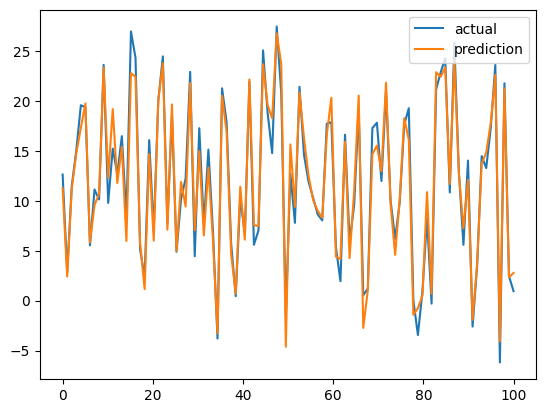

<Figure size 640x480 with 0 Axes>

In [132]:
train_n_days_ahead_v2(1, lstm_one_day_model, window, np.copy(x_raw), np.copy(y_raw), epochs=25, batch_size=128)

In [133]:
# Selecting the last window days as input
pred_x = prediction_data_x[-window:]
print(pred_x)

[[ 1.  25.   8.5  5.8]
 [ 1.  26.   7.4  3.5]
 [ 1.  27.   6.7  3.8]
 [ 1.  28.   6.3  2.4]
 [ 1.  29.   5.4  1.2]
 [ 1.  30.   5.2  0.5]
 [ 1.  31.   5.1  0.5]]


In [134]:
print(f"The prediction for tomorrow is {lstm_one_day_model.predict(np.array([pred_x]), verbose=0)[0][0]:.03}")

The prediction for tomorrow is 3.07


The rest of the predictions follow the same pattern, but with different window values and slightly different models.

# Predicting a week ahead

In [135]:
window = 21

lstm_one_week_model = None
lstm_one_week_model = Sequential()
lstm_one_week_model.add(LSTM(units=50, return_sequences= True, input_shape= (window,4)))
lstm_one_week_model.add(LSTM(units=25, return_sequences= True))
lstm_one_week_model.add(LSTM(units=25))
lstm_one_week_model.add(Dense(1, activation='linear'))

optimizer = Adam(learning_rate=0.01)
lstm_one_week_model.compile(loss='mse', optimizer=optimizer, metrics=['mse'])
lstm_one_week_model.summary()

Model: "sequential_15"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_39 (LSTM)              (None, 21, 50)            11000     
                                                                 
 lstm_40 (LSTM)              (None, 21, 25)            7600      
                                                                 
 lstm_41 (LSTM)              (None, 25)                5100      
                                                                 
 dense_22 (Dense)            (None, 1)                 26        
                                                                 
Total params: 23726 (92.68 KB)
Trainable params: 23726 (92.68 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


Training information: 
Epoch 1/25
170/170 - 8s - loss: 30.0681 - mse: 30.0681 - val_loss: 17.3737 - val_mse: 17.3737 - 8s/epoch - 48ms/step
Epoch 2/25
170/170 - 3s - loss: 14.2658 - mse: 14.2658 - val_loss: 13.6323 - val_mse: 13.6323 - 3s/epoch - 20ms/step
Epoch 3/25
170/170 - 3s - loss: 13.4230 - mse: 13.4230 - val_loss: 13.2212 - val_mse: 13.2212 - 3s/epoch - 20ms/step
Epoch 4/25
170/170 - 3s - loss: 13.3772 - mse: 13.3772 - val_loss: 12.9507 - val_mse: 12.9507 - 3s/epoch - 20ms/step
Epoch 5/25
170/170 - 3s - loss: 13.1331 - mse: 13.1331 - val_loss: 12.9075 - val_mse: 12.9075 - 3s/epoch - 19ms/step
Epoch 6/25
170/170 - 3s - loss: 12.7185 - mse: 12.7185 - val_loss: 13.8425 - val_mse: 13.8425 - 3s/epoch - 20ms/step
Epoch 7/25
170/170 - 3s - loss: 12.7222 - mse: 12.7222 - val_loss: 12.6601 - val_mse: 12.6601 - 3s/epoch - 20ms/step
Epoch 8/25
170/170 - 3s - loss: 12.5105 - mse: 12.5105 - val_loss: 13.1477 - val_mse: 13.1477 - 3s/epoch - 20ms/step
Epoch 9/25
170/170 - 3s - loss: 12.4665 -

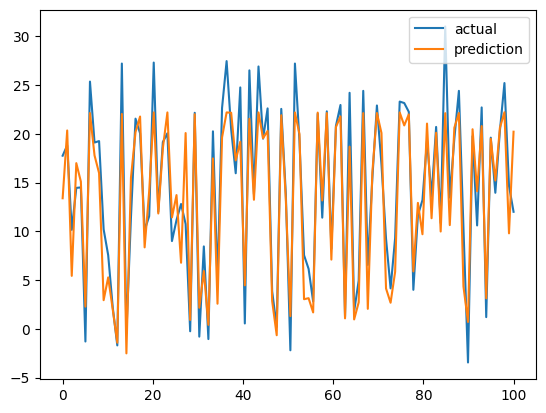

<Figure size 640x480 with 0 Axes>

In [136]:
train_n_days_ahead_v2(7, lstm_one_week_model, window, np.copy(x_raw), np.copy(y_raw), epochs=25, batch_size=128, use_lr_scheduler = False)

In [137]:
pred_x = prediction_data_x[-window:]
print(pred_x)

[[ 1.  11.   1.5 -1.2]
 [ 1.  12.   1.7 -0.9]
 [ 1.  13.   1.8 -1.5]
 [ 1.  14.   3.6 -0.3]
 [ 1.  15.   4.1  0.1]
 [ 1.  16.   2.3  0.1]
 [ 1.  17.   3.  -0.4]
 [ 1.  18.   9.6  4.1]
 [ 1.  19.   5.8  0.6]
 [ 1.  20.   2.8 -0.9]
 [ 1.  21.   2.6 -0.4]
 [ 1.  22.   2.8 -0.5]
 [ 1.  23.   7.7  0.4]
 [ 1.  24.   6.3  0.9]
 [ 1.  25.   8.5  5.8]
 [ 1.  26.   7.4  3.5]
 [ 1.  27.   6.7  3.8]
 [ 1.  28.   6.3  2.4]
 [ 1.  29.   5.4  1.2]
 [ 1.  30.   5.2  0.5]
 [ 1.  31.   5.1  0.5]]


In [138]:
print(f"The prediction for one week ahead is {lstm_one_week_model.predict(np.array([pred_x]), verbose=0)[0][0]:.03}")

The prediction for one week ahead is 1.78


# Predicting a month ahead

In [139]:
window = 100

lstm_one_month_model = None

lstm_one_month_model = Sequential()
lstm_one_month_model.add(LSTM(50, return_sequences= True, input_shape= (window,4)))
lstm_one_month_model.add(LSTM(50, return_sequences=True))
lstm_one_month_model.add(LSTM(50))
lstm_one_month_model.add(Dense(1, activation='linear'))

optimizer = Adam(learning_rate=0.001)
lstm_one_month_model.compile(loss='mse', optimizer=optimizer, metrics=['mse'])
lstm_one_month_model.summary()

Model: "sequential_16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_42 (LSTM)              (None, 100, 50)           11000     
                                                                 
 lstm_43 (LSTM)              (None, 100, 50)           20200     
                                                                 
 lstm_44 (LSTM)              (None, 50)                20200     
                                                                 
 dense_23 (Dense)            (None, 1)                 51        
                                                                 
Total params: 51451 (200.98 KB)
Trainable params: 51451 (200.98 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


Training information: 
Epoch 1/25
169/169 - 27s - loss: 64.2924 - mse: 64.2924 - val_loss: 25.0153 - val_mse: 25.0153 - 27s/epoch - 161ms/step
Epoch 2/25
169/169 - 23s - loss: 19.0490 - mse: 19.0490 - val_loss: 14.7427 - val_mse: 14.7427 - 23s/epoch - 135ms/step
Epoch 3/25
169/169 - 23s - loss: 14.5689 - mse: 14.5689 - val_loss: 13.6798 - val_mse: 13.6798 - 23s/epoch - 133ms/step
Epoch 4/25
169/169 - 22s - loss: 13.5897 - mse: 13.5897 - val_loss: 13.0842 - val_mse: 13.0842 - 22s/epoch - 133ms/step
Epoch 5/25
169/169 - 23s - loss: 13.1216 - mse: 13.1216 - val_loss: 13.1442 - val_mse: 13.1442 - 23s/epoch - 134ms/step
Epoch 6/25
169/169 - 23s - loss: 12.9605 - mse: 12.9605 - val_loss: 12.9848 - val_mse: 12.9848 - 23s/epoch - 133ms/step
Epoch 7/25
169/169 - 23s - loss: 12.8117 - mse: 12.8117 - val_loss: 13.3195 - val_mse: 13.3195 - 23s/epoch - 134ms/step
Epoch 8/25
169/169 - 22s - loss: 12.5311 - mse: 12.5311 - val_loss: 13.1912 - val_mse: 13.1912 - 22s/epoch - 133ms/step
Epoch 9/25
169/16

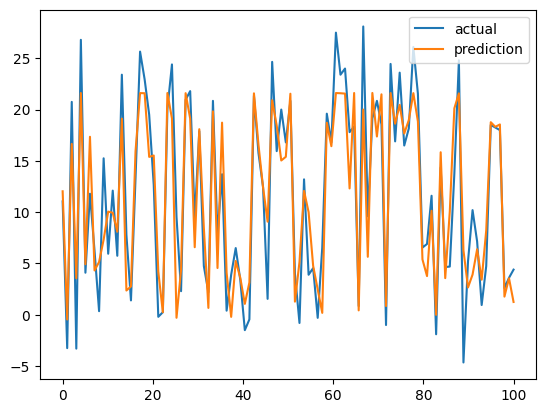

<Figure size 640x480 with 0 Axes>

In [140]:
train_n_days_ahead_v2(31, lstm_one_month_model, window, np.copy(x_raw), np.copy(y_raw), epochs=25, batch_size=128, use_lr_scheduler = False)

In [141]:
pred_x = prediction_data_x[-window:]
print(pred_x)

[[10.  24.  20.8 15.7]
 [10.  25.  16.7 14.1]
 [10.  26.  16.7 14.3]
 [10.  27.  16.8 11.8]
 [10.  28.  17.1 12.2]
 [10.  29.  19.  11.7]
 [10.  30.  22.8 15.8]
 [10.  31.  20.2 12. ]
 [11.   1.  15.6 10.3]
 [11.   2.  18.2 11.5]
 [11.   3.  15.3  9.9]
 [11.   4.  12.7  9.6]
 [11.   5.  13.  10.2]
 [11.   6.  14.7 10.9]
 [11.   7.  14.3  9.7]
 [11.   8.  12.2  9.1]
 [11.   9.  13.   7.3]
 [11.  10.  11.2  8.6]
 [11.  11.  10.5  7.4]
 [11.  12.   9.9  6. ]
 [11.  13.   9.7  6.7]
 [11.  14.  11.7  9.4]
 [11.  15.  13.1  9.9]
 [11.  16.  12.7  9.2]
 [11.  17.  10.4  5.6]
 [11.  18.   7.4  3.6]
 [11.  19.   6.4  3.3]
 [11.  20.  11.4  5.6]
 [11.  21.   9.3  7. ]
 [11.  22.   9.6  4.7]
 [11.  23.   6.8  2.1]
 [11.  24.   9.8  4.2]
 [11.  25.   3.9  1.1]
 [11.  26.   3.  -0.1]
 [11.  27.   4.6 -0.2]
 [11.  28.   4.9  3.2]
 [11.  29.   2.3 -0.5]
 [11.  30.   1.7  0.4]
 [12.   1.   2.6  1.2]
 [12.   2.   5.2  2. ]
 [12.   3.   0.4 -1.4]
 [12.   4.   1.4 -1.4]
 [12.   5.   1.7 -0.3]
 [12.   6. 

In [142]:
print(f"The prediction for one moth ahead is {lstm_one_month_model.predict(np.array([pred_x]), verbose=0)[0][0]:.03}")

The prediction for one moth ahead is 5.44
